In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Loading flower dataset and precomputed graph edges / sentiment score

In [142]:
flower_data = pd.read_csv("../Data/General/flower_cleaned.csv", error_bad_lines=False, delimiter=";")

In [144]:
flower_data.head(100)

,Flower,Meaning,AfinnScore,SimilarIndex40,SimilarIndex30
0,Acacia,secret love,3,"[145, 181]","[6, 9, 13, 20, 24, 26, 32, 39, 44, 61, 62, 63,..."
1,Acanthus,art,0,[],[]
2,Aconite,misanthropy,0,[],[]
3,Agrimony,thankfulness,0,[],[]
4,Aloe,grief,-2,"[112, 201, 263, 293]","[112, 201, 263, 293, 350]"
5,Almond,promise,1,"[100, 221, 328]","[100, 221, 296, 328]"
6,Amaranth (Globe),immortal love,5,"[20, 62, 147, 181, 250]","[9, 13, 20, 24, 26, 32, 39, 44, 61, 62, 63, 67..."
7,Amaranth,immortality,0,[],[]
8,Amaryllis,pride,0,[],[]
9,Ambrosia,love is reciprocated,3,"[13, 20, 39, 44, 62, 67, 94, 98, 106, 115, 120...","[13, 20, 23, 24, 26, 28, 32, 39, 44, 61, 62, 6..."


---
# Testing out NetworkX

In [10]:
import networkx as nx
G = nx.Graph()

In [11]:
G.add_nodes_from(range(0, 10))

In [12]:
G.add_edges_from([(1, 2), (4, 5), (1, 6), (6, 8)])

In [13]:
G.nodes[1]['name'] = "hello"

In [14]:
G.nodes.data()

NodeDataView({0: {}, 1: {'name': 'hello'}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}})

In [111]:
G.edges.data()

EdgeDataView([(1, 2, {}), (1, 6, {}), (4, 5, {}), (6, 8, {})])

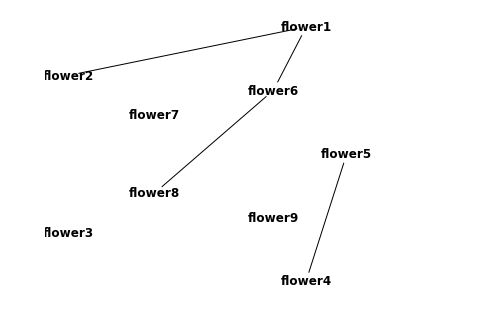

In [65]:
#nx.draw(G, with_labels=True, font_weight='bold')
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold', node_color="w", cmap=plt.get_cmap('jet'), labels={1: 'flower1', 2: 'flower2',3: 'flower3',4: 'flower4',5: 'flower5', 6: 'flower6', 7: 'flower7',8: 'flower8',9: 'flower9'})

---
# Building flower meaning graph

In [113]:
flower_graph = nx.Graph()

In [141]:
def add_nodes_from_df(graph, df):
    for index in range(len(df)):
        graph.add_node(index, flower=df.iloc[index].Flower, meaning=df.iloc[index].Meaning, sentiment=df.iloc[index].AfinnScore)

def add_edges_from_df(graph, df, similar_index):
    for index in range(len(df)):
        edges = flower_data.iloc[index][similar_index].lstrip("[").rstrip("]").split(",")
        if edges != [""]:
            for node in edges:
                graph.add_edge(index, int(node))

In [114]:
add_nodes_from_df(flower_graph, flower_data)
#flower_graph.nodes.data()

In [115]:
add_edges_from_df(flower_graph, flower_data, "SimilarIndex40")
#flower_graph.edges.data()

In [116]:
node_flower_name = nx.get_node_attributes(flower_graph, 'flower')

<Figure size 2160x1080 with 0 Axes>

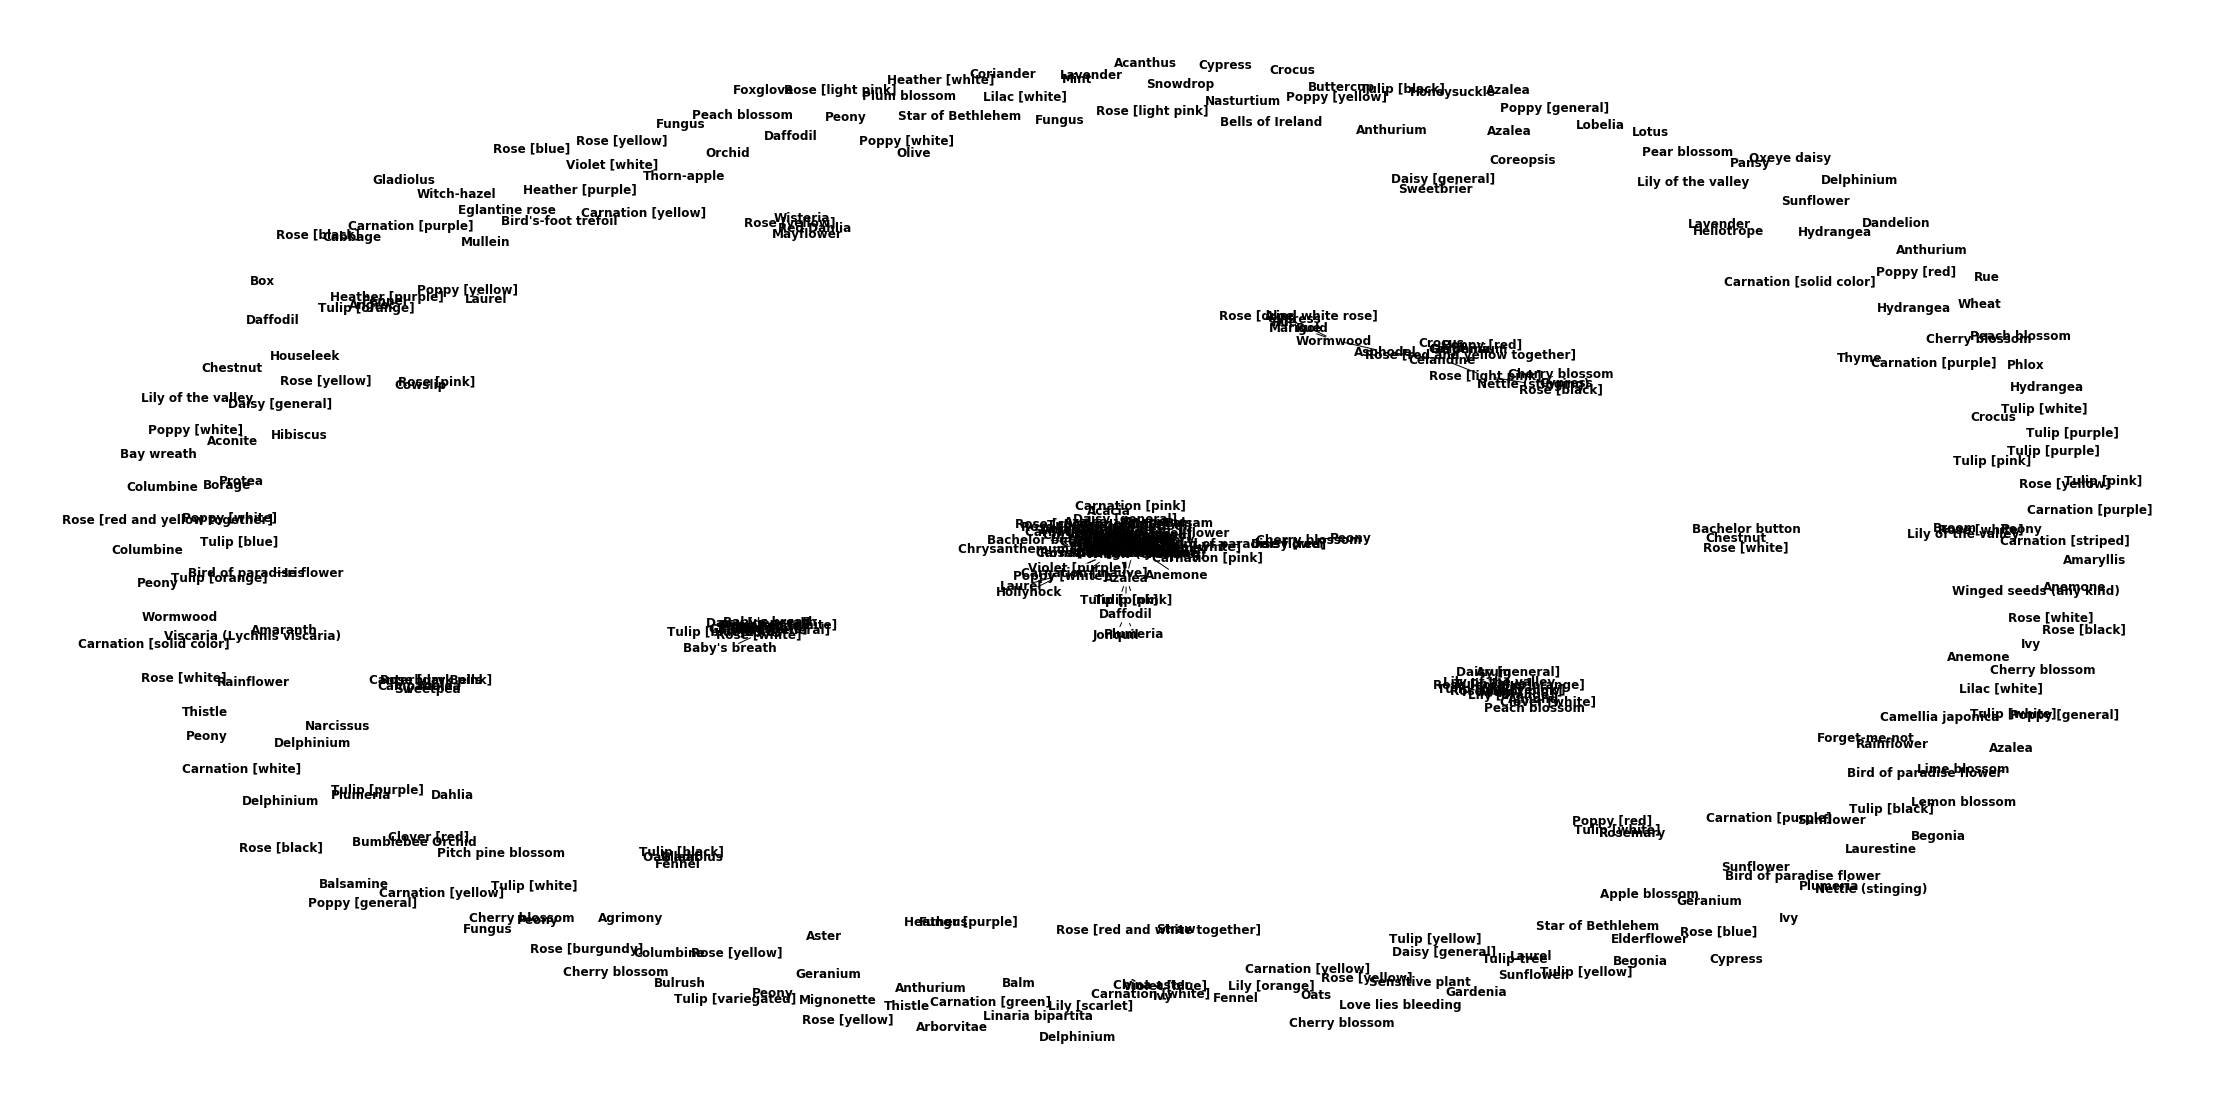

In [137]:
plt.figure(figsize=(30,15))

# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k =0.1 and iterations=50
pos = nx.spring_layout(flower_graph, k=0.20, iterations=60)
#pos = nx.kamada_kawai_layout(flower_graph)

nx.draw_spring(flower_graph, with_labels=True, font_weight='bold', node_color="w", labels=node_flower_name)

<Figure size 2160x1080 with 0 Axes>

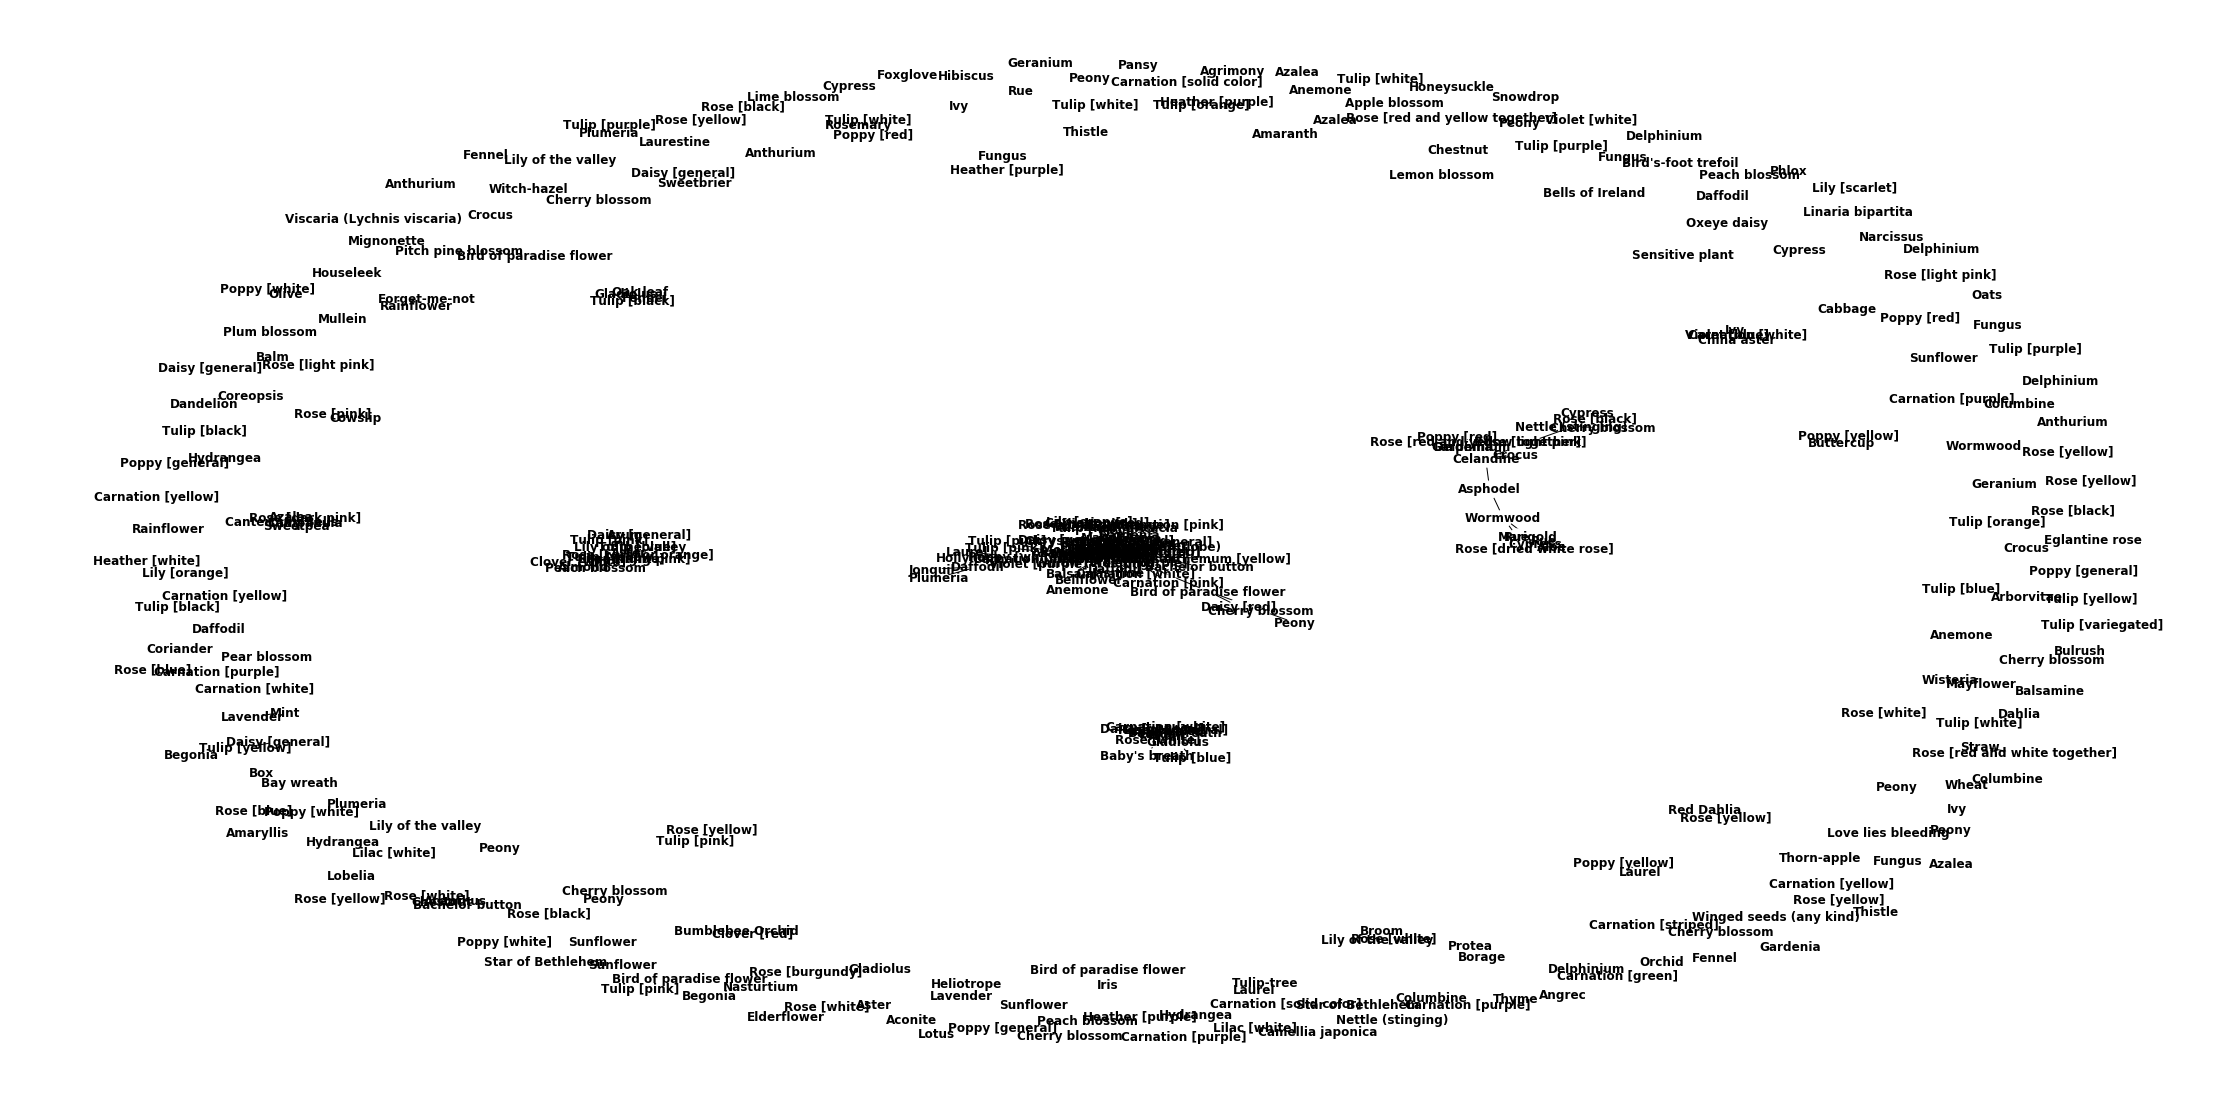

In [139]:
plt.figure(figsize=(30,15))
pos = nx.kamada_kawai_layout(flower_graph)
nx.draw_spring(flower_graph, with_labels=True, font_weight='bold', node_color="w", labels=node_flower_name)

In [145]:
flower_graph_threshold_30 = nx.Graph()

In [146]:
add_nodes_from_df(flower_graph_threshold_30, flower_data)
#flower_graph.nodes.data()

In [147]:
add_edges_from_df(flower_graph_threshold_30, flower_data, "SimilarIndex30")
#flower_graph.edges.data()

<Figure size 2160x1080 with 0 Axes>

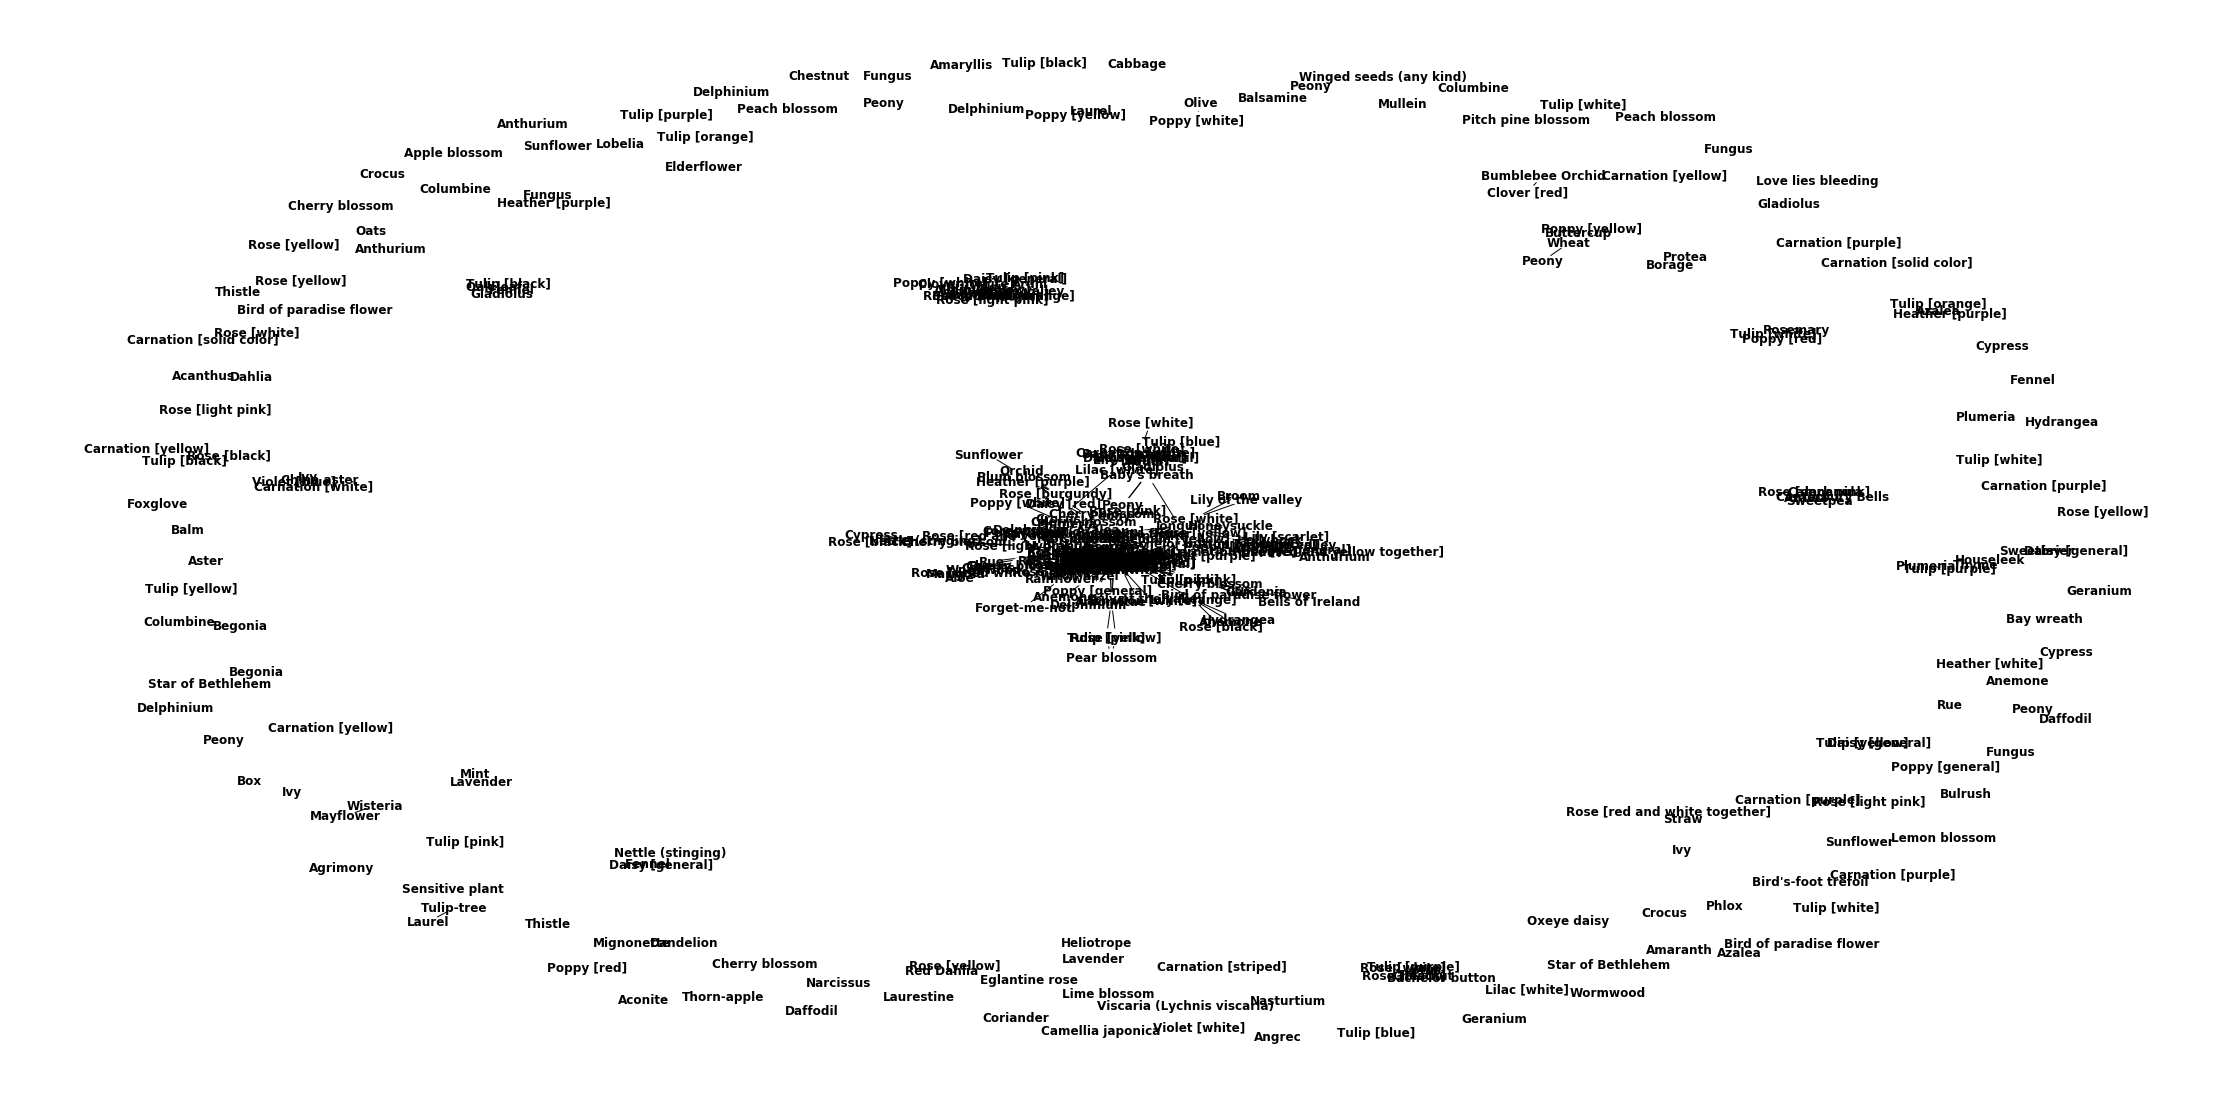

In [148]:
plt.figure(figsize=(30,15))
pos = nx.spring_layout(flower_graph_threshold_30, k=0.20, iterations=60)
nx.draw_spring(flower_graph_threshold_30, with_labels=True, font_weight='bold', node_color="w", labels=node_flower_name)